In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib
import seaborn as sns

# Data Generation

In [26]:
qiskitexp1 = ["./Qiskit/Experiment 1/baseline_training_data/{}".format(x) for x in os.listdir("./Qiskit/Experiment 1/baseline_training_data/") if "ToD" in x]
#qiskitexp2 = ["./Qiskit/Experiment 2/baseline_training_data/{}".format(x) for x in os.listdir("./Qiskit/Experiment 2/baseline_training_data/") if "ToD" in x]
cirqexp1 = ["./Cirq/Experiment 1/baseline_training_data/{}".format(x) for x in os.listdir("./Cirq/Experiment 1/baseline_training_data/") if "ToD" in x]
#cirqexp2 = ["./Cirq/Experiment 2/baseline_training_data/{}".format(x) for x in os.listdir("./Cirq/Experiment 2/baseline_training_data/") if "ToD" in x]
rigettiexp1 = ["./Rigetti/Experiment 1/baseline_training_data/{}".format(x) for x in os.listdir("./Rigetti/Experiment 1/baseline_training_data/") if "ToD" in x]
#rigettiexp2 = ["./Rigetti/Experiment 2/baseline_training_data/{}".format(x) for x in os.listdir("./Rigetti/Experiment 2/baseline_training_data/") if "ToD" in x]
files = []
files.extend(qiskitexp1)
#files.extend(qiskitexp2)
files.extend(cirqexp1)
#files.extend(cirqexp2)
files.extend(rigettiexp1)
#files.extend(rigettiexp2)

In [27]:
dt = []
for file in files:
    df = pd.read_csv(file,header=None)
    dt.append(df.mean(axis=1).values[0])

In [32]:
print("Time of data generation for one backend = {} minutes".format(np.ceil(np.mean(dt)/60)))

Time of data generation for one backend = 12.0 minutes


# MLP Training

In [33]:
qiskitexp1 = ["./Qiskit/Experiment 1/baseline_training_data/{}".format(x) for x in os.listdir("./Qiskit/Experiment 1/baseline_training_data/") if "ToT" in x]
#qiskitexp2 = ["./Qiskit/Experiment 2/baseline_training_data/{}".format(x) for x in os.listdir("./Qiskit/Experiment 2/baseline_training_data/") if "ToD" in x]
cirqexp1 = ["./Cirq/Experiment 1/baseline_training_data/{}".format(x) for x in os.listdir("./Cirq/Experiment 1/baseline_training_data/") if "ToT" in x]
#cirqexp2 = ["./Cirq/Experiment 2/baseline_training_data/{}".format(x) for x in os.listdir("./Cirq/Experiment 2/baseline_training_data/") if "ToD" in x]
rigettiexp1 = ["./Rigetti/Experiment 1/baseline_training_data/{}".format(x) for x in os.listdir("./Rigetti/Experiment 1/baseline_training_data/") if "ToT" in x]
#rigettiexp2 = ["./Rigetti/Experiment 2/baseline_training_data/{}".format(x) for x in os.listdir("./Rigetti/Experiment 2/baseline_training_data/") if "ToD" in x]
files = []
files.extend(qiskitexp1)
#files.extend(qiskitexp2)
files.extend(cirqexp1)
#files.extend(cirqexp2)
files.extend(rigettiexp1)
#files.extend(rigettiexp2)

In [34]:
dt = []
for file in files:
    df = pd.read_csv(file,header=None)
    dt.append(df.mean(axis=1).values[0])

In [35]:
print("Time of Baseline Training for one backend = {} minutes".format(np.ceil(np.mean(dt)/60)))

Time of Baseline Training for one backend = 1.0 minutes


# Tuner

In [40]:
qiskitexp1 = ["./Qiskit/Experiment 1/baseline_tunning_data/{}".format(x) for x in os.listdir("./Qiskit/Experiment 1/baseline_tunning_data/") if "ToT" in x]
#qiskitexp2 = ["./Qiskit/Experiment 2/baseline_training_data/{}".format(x) for x in os.listdir("./Qiskit/Experiment 2/baseline_training_data/") if "ToD" in x]
cirqexp1 = ["./Cirq/Experiment 1/baseline_tunning_data/{}".format(x) for x in os.listdir("./Cirq/Experiment 1/baseline_tunning_data/") if "ToT" in x]
#cirqexp2 = ["./Cirq/Experiment 2/baseline_training_data/{}".format(x) for x in os.listdir("./Cirq/Experiment 2/baseline_training_data/") if "ToD" in x]
rigettiexp1 = ["./Rigetti/Experiment 1/baseline_tunning_data/{}".format(x) for x in os.listdir("./Rigetti/Experiment 1/baseline_tunning_data/") if "ToT" in x]
#rigettiexp2 = ["./Rigetti/Experiment 2/baseline_training_data/{}".format(x) for x in os.listdir("./Rigetti/Experiment 2/baseline_training_data/") if "ToD" in x]
files = []
files.extend(qiskitexp1)
#files.extend(qiskitexp2)
files.extend(cirqexp1)
#files.extend(cirqexp2)
files.extend(rigettiexp1)
#files.extend(rigettiexp2)

In [48]:
dt = []
for file in files:
    df = pd.read_csv(file,header=None)
    dt.append(df.loc[:,2].values[0])

In [49]:
print("Time of Tunner for one circuit_backend = {} minutes".format(np.ceil(np.mean(dt)/60)))

Time of Tunner for one circuit_backend = 14.0 minutes


# Distribution Analysis

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

import urllib.request
import pandas as pd
import numpy as np
import time
import ktrain
from ktrain import tabular
from sklearn.model_selection import train_test_split
from tqdm import *
pd.set_option('display.max_columns', None)

import random
import pandas as pd
from tqdm import *
import pkgutil
import warnings
import exrex
import math
import time
import json
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
warnings.filterwarnings('ignore')


# # Results

# # Results From Paper Metrics

# In[2]:


import forest.benchmarking.distance_measures as dm
from scipy.spatial.distance import jensenshannon as jhn
def HellingerDistance(p, q):
    
    if len(p)!=len(q):
        q = np.append(arr=p,values=[[0.0] for x in range(len(p)-q.shape[0])],axis=0)
    
    n = len(p)
    sum_ = 0.0
    for i in range(n):
        sum_ += (np.sqrt(p[i]) - np.sqrt(q[i]))**2
    result = (1.0 / np.sqrt(2.0)) * np.sqrt(sum_)
    return result

In [23]:
from IPython.utils import io

with io.capture_output() as captured:
    datas = []
    for run in tqdm(range(10)):

        RQ1C = defaultdict(lambda:{})

        for datafiles in os.listdir("./Qiskit/Experiment 1/density/"):
            print(datafiles)
            _,itn,bk,name = datafiles.split(".")[0].split("_")

            #if int(itn)==run and "Jakarta" in bk:
            if int(itn)==run:

                with open("./Qiskit/Experiment 1/density/_{}_{}_{}.json".format(itn,bk,name),"r") as file:
                    data = json.load(file)

                noise_data = data["noise"]
                ideal_data = data["ideal"]

                Filter_HL  = []
                Noise_HL   = []


                for i,(each_input_ideal,each_input_noise) in enumerate(zip(ideal_data,noise_data)):
                    noise_probs = []
                    ideal_probs_for_noise = []
                    for key in each_input_ideal.keys():
                        for noise_value in each_input_noise[key]["probability"]:
                            noise_probs.append(noise_value["prob"])
                            found = False
                            for values in each_input_ideal[key]["probability"]:
                                if noise_value["bin"]==values["bin"]:
                                    ideal_probs_for_noise.append(values["prob"])
                                    found = True
                                    break
                            if not found:
                                ideal_probs_for_noise.append(0)

                    PN = np.array([ideal_probs_for_noise]).reshape(-1,1)
                    QN = np.array([noise_probs]).reshape(-1,1)
                    HL_noise = HellingerDistance(PN,QN)[0]
                    Noise_HL.append(HL_noise)


                predictor = ktrain.load_predictor('./Qiskit/Experiment 1/tunning_models/{}_{}'.format(bk,name))
                for i,(each_input_ideal,each_input_noise) in enumerate(zip(ideal_data,noise_data)):
                    filter_probs = []
                    ideal_probs = []
                    for key in each_input_ideal.keys():
                        for ideal_value in each_input_ideal[key]["probability"]:
                            ideal_probs.append(ideal_value["prob"])
                            found = False
                            for values in each_input_noise[key]["probability"]:
                                if ideal_value["bin"]==values["bin"]:
                                    all_other_probs = sum([x["prob"] for x in each_input_noise[key]["probability"] if x["bin"]!=values["bin"]])
                                    odr = values["odds"]
                                    pos = values["prob"]
                                    pof = 1-pos
                                    temp2 = pd.DataFrame([[pof,odr,pos]],columns=["POF","ODR","POS"])
                                    prediction = predictor.predict(temp2)[0]
                                    #print(prediction)
                                    if prediction[0]<0:
                                        filter_probs.append(0)
                                    elif prediction[0]>1:
                                        filter_probs.append(1)
                                    else:
                                        filter_probs.append(prediction[0])        
                                    found = True
                                    break                

                    if len(ideal_probs)<=1:
                        ideal_probs.append(0)
                        filter_probs.append(0)
                    PF = np.array([ideal_probs]).reshape(-1,1)
                    QF = np.array([filter_probs]).reshape(-1,1)
                    HL_filter = HellingerDistance(PF,QF)[0]
                    Filter_HL.append(HL_filter)

                RQ1C[bk][name] = {
                                 "FilterHL":Filter_HL,
                                 "NoiseHL":Noise_HL,
                                }
        datas.append(RQ1C)

    rqfile = open("qiskit.json","w")
    json.dump(datas,rqfile)
    rqfile.close()

In [2]:
from IPython.utils import io

with io.capture_output() as captured:
    datas = []
    for run in tqdm(range(10)):

        RQ1C = defaultdict(lambda:{})

        for datafiles in os.listdir("./Cirq/Experiment 1/density/"):
            print(datafiles)
            _,itn,bk,name = datafiles.split(".")[0].split("_")

            #if int(itn)==run and "Jakarta" in bk:
            if int(itn)==run:

                with open("./Cirq/Experiment 1/density/_{}_{}_{}.json".format(itn,bk,name),"r") as file:
                    data = json.load(file)

                noise_data = data["noise"]
                ideal_data = data["ideal"]

                Filter_HL  = []
                Noise_HL   = []


                for i,(each_input_ideal,each_input_noise) in enumerate(zip(ideal_data,noise_data)):
                    noise_probs = []
                    ideal_probs_for_noise = []
                    for key in each_input_ideal.keys():
                        for noise_value in each_input_noise[key]["probability"]:
                            noise_probs.append(noise_value["prob"])
                            found = False
                            for values in each_input_ideal[key]["probability"]:
                                if noise_value["bin"]==values["bin"]:
                                    ideal_probs_for_noise.append(values["prob"])
                                    found = True
                                    break
                            if not found:
                                ideal_probs_for_noise.append(0)

                    PN = np.array([ideal_probs_for_noise]).reshape(-1,1)
                    QN = np.array([noise_probs]).reshape(-1,1)
                    HL_noise = HellingerDistance(PN,QN)[0]
                    Noise_HL.append(HL_noise)


                predictor = ktrain.load_predictor('./Cirq/Experiment 1/tunning_models/{}_{}'.format(bk,name))
                for i,(each_input_ideal,each_input_noise) in enumerate(zip(ideal_data,noise_data)):
                    filter_probs = []
                    ideal_probs = []
                    for key in each_input_ideal.keys():
                        for ideal_value in each_input_ideal[key]["probability"]:
                            ideal_probs.append(ideal_value["prob"])
                            found = False
                            for values in each_input_noise[key]["probability"]:
                                if ideal_value["bin"]==values["bin"]:
                                    all_other_probs = sum([x["prob"] for x in each_input_noise[key]["probability"] if x["bin"]!=values["bin"]])
                                    odr = values["odds"]
                                    pos = values["prob"]
                                    pof = 1-pos
                                    temp2 = pd.DataFrame([[pof,odr,pos]],columns=["POF","ODR","POS"])
                                    prediction = predictor.predict(temp2)[0]
                                    #print(prediction)
                                    if prediction[0]<0:
                                        filter_probs.append(0)
                                    elif prediction[0]>1:
                                        filter_probs.append(1)
                                    else:
                                        filter_probs.append(prediction[0])        
                                    found = True
                                    break                

                    if len(ideal_probs)<=1:
                        ideal_probs.append(0)
                        filter_probs.append(0)
                    PF = np.array([ideal_probs]).reshape(-1,1)
                    QF = np.array([filter_probs]).reshape(-1,1)
                    HL_filter = HellingerDistance(PF,QF)[0]
                    Filter_HL.append(HL_filter)

                RQ1C[bk][name] = {
                                 "FilterHL":Filter_HL,
                                 "NoiseHL":Noise_HL,
                                }
        datas.append(RQ1C)

    rqfile = open("cirq.json","w")
    json.dump(datas,rqfile)
    rqfile.close()

In [3]:
from IPython.utils import io

with io.capture_output() as captured:
    datas = []
    for run in tqdm(range(10)):

        RQ1C = defaultdict(lambda:{})

        for datafiles in os.listdir("./Rigetti/Experiment 1/density/"):
            print(datafiles)
            _,itn,bk,name = datafiles.split(".")[0].split("_")

            #if int(itn)==run and "Jakarta" in bk:
            if int(itn)==run:

                with open("./Rigetti/Experiment 1/density/_{}_{}_{}.json".format(itn,bk,name),"r") as file:
                    data = json.load(file)

                noise_data = data["noise"]
                ideal_data = data["ideal"]

                Filter_HL  = []
                Noise_HL   = []


                for i,(each_input_ideal,each_input_noise) in enumerate(zip(ideal_data,noise_data)):
                    noise_probs = []
                    ideal_probs_for_noise = []
                    for key in each_input_ideal.keys():
                        for noise_value in each_input_noise[key]["probability"]:
                            noise_probs.append(noise_value["prob"])
                            found = False
                            for values in each_input_ideal[key]["probability"]:
                                if noise_value["bin"]==values["bin"]:
                                    ideal_probs_for_noise.append(values["prob"])
                                    found = True
                                    break
                            if not found:
                                ideal_probs_for_noise.append(0)

                    PN = np.array([ideal_probs_for_noise]).reshape(-1,1)
                    QN = np.array([noise_probs]).reshape(-1,1)
                    HL_noise = HellingerDistance(PN,QN)[0]
                    Noise_HL.append(HL_noise)


                predictor = ktrain.load_predictor('./Rigetti/Experiment 1/tunning_models/{}_{}'.format(bk,name))
                for i,(each_input_ideal,each_input_noise) in enumerate(zip(ideal_data,noise_data)):
                    filter_probs = []
                    ideal_probs = []
                    for key in each_input_ideal.keys():
                        for ideal_value in each_input_ideal[key]["probability"]:
                            ideal_probs.append(ideal_value["prob"])
                            found = False
                            for values in each_input_noise[key]["probability"]:
                                if ideal_value["bin"]==values["bin"]:
                                    all_other_probs = sum([x["prob"] for x in each_input_noise[key]["probability"] if x["bin"]!=values["bin"]])
                                    odr = values["odds"]
                                    pos = values["prob"]
                                    pof = 1-pos
                                    temp2 = pd.DataFrame([[pof,odr,pos]],columns=["POF","ODR","POS"])
                                    prediction = predictor.predict(temp2)[0]
                                    #print(prediction)
                                    if prediction[0]<0:
                                        filter_probs.append(0)
                                    elif prediction[0]>1:
                                        filter_probs.append(1)
                                    else:
                                        filter_probs.append(prediction[0])        
                                    found = True
                                    break                

                    if len(ideal_probs)<=1:
                        ideal_probs.append(0)
                        filter_probs.append(0)
                    PF = np.array([ideal_probs]).reshape(-1,1)
                    QF = np.array([filter_probs]).reshape(-1,1)
                    HL_filter = HellingerDistance(PF,QF)[0]
                    Filter_HL.append(HL_filter)

                RQ1C[bk][name] = {
                                 "FilterHL":Filter_HL,
                                 "NoiseHL":Noise_HL,
                                }
        datas.append(RQ1C)

    rqfile = open("rigetti.json","w")
    json.dump(datas,rqfile)
    rqfile.close()

# Load

In [2]:
with open("qiskit.json","r") as file:
    q = json.load(file)
with open("cirq.json","r") as file:
    c = json.load(file)
with open("rigetti.json","r") as file:
    r = json.load(file)

In [4]:
datas = []
datas.extend(q)
datas.extend(c)
datas.extend(r)

In [5]:
programs = []
backends = []
types = []
values = []
for RQ1C in datas:
    for bk in RQ1C.keys():
        for prog in RQ1C[bk].keys():
            fil = np.mean(RQ1C[bk][prog]["FilterHL"])
            noi = np.mean(RQ1C[bk][prog]["NoiseHL"])
            programs.append(prog)
            backends.append(bk.replace("Fake",""))
            types.append("noise")
            values.append(noi)
            programs.append(prog)
            backends.append(bk.replace("Fake",""))
            types.append("filter")
            values.append(fil)

dt = pd.DataFrame()
dt["Programs"] = programs
dt["backends"] = backends
dt["Hellinger Distance"] = values
dt["type"] = types

dt

,Programs,backends,Hellinger Distance,type
0,addition,Almaden,0.626530,noise
1,addition,Almaden,0.002459,filter
2,ghz,Almaden,0.309612,noise
3,ghz,Almaden,0.011842,filter
4,phase,Almaden,0.331580,noise
...,...,...,...,...
3115,qft,9q-square,0.640816,filter
3116,similarity,9q-square,0.678245,noise
3117,similarity,9q-square,0.648121,filter
3118,simon,9q-square,0.707107,noise


In [9]:
bk_data = []
for RQ1C in datas:
    another = {}

    for bk in RQ1C.keys():
        bk_hln  = []
        bk_hlf  = []
        for program in RQ1C[bk].keys():
            hln = np.mean(RQ1C[bk][program]["NoiseHL"])
            hlf = np.mean(RQ1C[bk][program]["FilterHL"])
            bk_hln.append(hln)
            bk_hlf.append(hlf)
        another[bk.replace("Fake","").replace("AlternativeBasis","V2")] = {
                           "Avg Filter HL":np.mean(bk_hlf),
                           "Avg Noise HL":np.mean(bk_hln)}


    # In[9]:


    bk_perspective = pd.DataFrame.from_dict(another).T
    bk_perspective["Improv HL"] = np.round((bk_perspective["Avg Noise HL"].values-bk_perspective["Avg Filter HL"].values)/bk_perspective["Avg Noise HL"].values*100,2)
    bk_perspective[["Avg Filter HL","Avg Noise HL","Improv HL"]].sort_index().round(2)
    bk_data.append(bk_perspective)

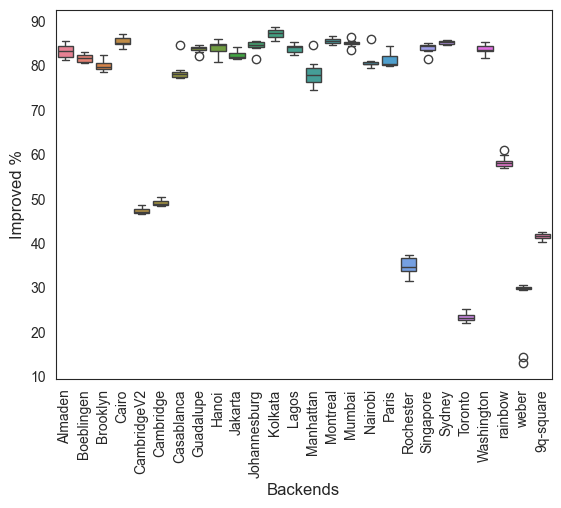

In [22]:
sns.set_style("white")
dt2 = pd.concat(bk_data)
dt2 = dt2.reset_index(names="backends")
#plt.figure(figsize=(15,7))
plt.figure()
ax = sns.boxplot(data=dt2,x="backends",y="Improv HL",hue="backends")
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Backends', fontsize=12)
ax.set_ylabel('Improved %', fontsize=12)

plt.savefig('./results/distribution.png',bbox_inches='tight',dpi=600)
plt.show()

In [8]:
dt2.groupby('backends')[["Avg Noise HL","Avg Filter HL","Improv HL"]].mean()

,Avg Noise HL,Avg Filter HL,Improv HL
backends,,,
9q-square,0.661178,0.386172,41.593
Almaden,0.470313,0.079307,83.136
Boeblingen,0.448530,0.082520,81.603
Brooklyn,0.398863,0.079807,79.990
Cairo,0.333700,0.048710,85.404
Cambridge,0.497787,0.253654,49.037
CambridgeAlternativeBasis,0.495597,0.260946,47.341
Casablanca,0.418658,0.089472,78.629
Guadalupe,0.388279,0.063302,83.697
